# Assignment 1


## Step 1 : data conversion


In [1]:
import zipfile

# from pprint import pprint


def load_data():
    # extract the zip file
    with zipfile.ZipFile("dataset_42028assg1_24581896.zip", "r") as file:
        # extract the file
        file.extractall("dataset")

    pass


load_data()

In [1]:
import pandas as pd
import numpy as np
import os
# import tensorflow as tf
import glob
import cv2

# import tensorflow

# data struct
# {
#     id: int,
#     label: str,
#     data: np.array
# }


# load the data into a pandas dataframe
def load_data():
    # load the data and file name as dataframe
    data_list = []
    labels = [x for x in os.listdir("dataset")]

    for label in labels:
        for file in glob.glob(f"dataset/{label}/*.jpg"):
            file_data= cv2.imread(file, cv2.IMREAD_GRAYSCALE)
            file_data= cv2.resize(file_data, (96, 96), interpolation=cv2.INTER_LINEAR)
            # read imge as numpy array
            data_list.append(
                {
                    "label": label,
                    "label_id": labels.index(label),
                    "filename": file,
                    "data":file_data
                }
            )
    print(len(data_list))
    return pd.DataFrame(data_list), labels


data_df, labels = load_data()

print(data_df.head(5))
print(labels)

5000
  label  label_id                filename  \
0     ]         0   dataset/]/exp5082.jpg   
1     ]         0   dataset/]/]_88548.jpg   
2     ]         0  dataset/]/exp81869.jpg   
3     ]         0   dataset/]/exp6417.jpg   
4     ]         0   dataset/]/]_78652.jpg   

                                                data  
0  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
2  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
3  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
4  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
[']', '[', 'geq', '+', 'alpha', 'neq', 'tan', '(', 'div', 'cos']


In [9]:
import tensorflow
print(tensorflow.__version__)
print(tensorflow.config.list_logical_devices(device_type="cuda"))

print(tensorflow.config.list_physical_devices('GPU'))

2.16.1
[]
[]


In [4]:
import matplotlib.pyplot as plt

def show_image(input_image):
  plt.imshow(input_image, cmap='gray')  # Make sure that the plot is drawn in grayscale
  plt.axis('off')
  plt.title("Input Image")
  plt.show()

In [2]:
import pandas as pd
# import pickle
from sklearn.model_selection import train_test_split


## snapshot the data
def snapshot_data(data: pd.DataFrame, labels: list):
    # snapshot the data
    # store the data as a  file
    data.to_pickle('./raw_data.pkl')
    with open("labels.txt", "w") as file:
        file.write("\n".join(labels))

    return


def shuffle_data(data_df: pd.DataFrame):
    clone_df_X = data_df.copy()
    clone_df_y = data_df.copy()
    # shuffle the data
    clone_df_X = clone_df_X.drop(columns=["filename", "label", "label_id"])
    clone_df_y = clone_df_y.drop(columns=["filename", "data", "label"])
    return train_test_split(
        clone_df_X, clone_df_y, test_size=0.3, random_state=24581896
    )


# snapshot the data
snapshot_data(data_df, labels)


# usage; for later use

#  do the snapshot for the shuffled data 
# X_train.to_pickle("X_train.pkl")
# X_test.to_pickle("X_test.pkl")
# y_train.to_pickle("y_train.pkl")
# y_test.to_pickle("y_test.pkl")




In [6]:
X_train, X_test, y_train, y_test = shuffle_data(data_df)
print(X_train.head(5))
print(y_train.head(5))

                                                   data
4306  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1617  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
3925  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
971   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
3544  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
      label_id
4306         8
1617         3
3925         7
971          1
3544         7


In [7]:
# import pandas as pd
# # data recovery
# data_df = pd.read_pickle("raw_data.pkl")
# labels = open("labels.txt", "r").read().split("\n")

In [ ]:
import pandas as pd
# data recovery
X_train_raw = pd.read_pickle("X_train.pkl")
X_test_raw = pd.read_pickle("X_test.pkl")
y_train_raw = pd.read_pickle("y_train.pkl")
y_test_raw = pd.read_pickle("y_test.pkl")

labels = open("labels.txt", "r").read().split("\n")

# Step 2 : Data Preprocessing for SVM

since the dataset is not enstrenght, we need to preprocess the data to make it suitable for training the model.

1. create a HoG feature setting for setting managing.
2. apply the HoG feature extraction to the images.
3. create a SVM model 
4. train classifier by SVM multiclass classifier


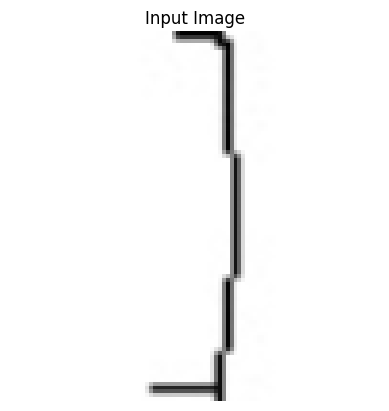

(96, 96)

In [6]:
show_image(data_df['data'][2])
data_df['data'][1].shape


In [3]:

import cv2

class HoGSetting:
    cell_size: tuple = (2,2)
    block_size: tuple = (4,4)
    win_size: tuple = (8,8)
    nbins: int = 9
    hog_descriptor: cv2.HOGDescriptor

    def __init__(self, **kwarg):
        # initialize
        self.cell_size = kwarg.get('cell_size', self.cell_size)
        self.block_size = kwarg.get('block_size', self.block_size)
        self.win_size = kwarg.get('win_size', self.win_size)
        self.nbins = kwarg.get('nbins', self.nbins)
        
        # create a HOG object
        self.hog_descriptor = cv2.HOGDescriptor(
            _winSize=(self.win_size[1] * self.cell_size[1],
                    self.win_size[0] * self.cell_size[0]),
            _blockSize=(self.block_size[1] * self.cell_size[1],
                        self.block_size[0] * self.cell_size[0]),
            _blockStride=(self.cell_size[1], self.cell_size[0]),
            _cellSize=(self.cell_size[1], self.cell_size[0]),
            _nbins=self.nbins,
            _histogramNormType = cv2.HOGDescriptor_L2Hys
        )
        self.hog_descriptor.save('hog_feat.xml')
        

    # compile
    def compile_feat(self, img):
        img_size = img.shape[:2]  # h x w in pixels
        n_cells = (img_size[0] // self.cell_size[0], img_size[1] // self.cell_size[1])
        # find features as a 1xN vector, then reshape into spatial hierarchy

        hog_feats = self.hog_descriptor.compute(img)

        hog_feats = hog_feats.reshape(
            n_cells[1] - self.win_size[1] + 1,
            n_cells[0] - self.win_size[0] + 1,
            self.win_size[1] - self.block_size[1] + 1,
            self.win_size[0] - self.block_size[0] + 1,
            self.block_size[1],
            self.block_size[0],
            self.nbins)

        return hog_feats
    pass 


hog_setting = HoGSetting()

### usage; for later use 

# _hog_feat = hog_setting.compile_feat(img)
# print(_hog_feat)  
  


In [7]:
# since using the raw data frame is too large for svm process 
# here to split the X_train and X_test to apply the HoG Compile

X_train_svm = X_train.copy()
X_test_svm = X_test.copy()

X_train_svm['data'] = X_train_svm['data'].apply(hog_setting.compile_feat)
X_train_svm.to_pickle('./snapshot_x_train_svm.pkl')
print('x_train done apply')
X_test_svm['data'] = X_test_svm['data'].apply(hog_setting.compile_feat)
X_test_svm.to_pickle('./snapshot_x_train_svm.pkl')
print('x_test done apply')



: 

## 2.2 create the SVM model

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='rbf',C=100.0, random_state=24581896) # rbf Kernel
model.fit(data_train, labels_train)